In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    directory='dataset',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 1944 files belonging to 15 classes.
['Bear', 'Bird', 'Cat', 'Cow', 'Deer', 'Dog', 'Dolphin', 'Elephant', 'Giraffe', 'Horse', 'Kangaroo', 'Lion', 'Panda', 'Tiger', 'Zebra']


## Load the Model

In [3]:
cnn = tf.keras.models.load_model('trained_animal_classifier_model.keras')

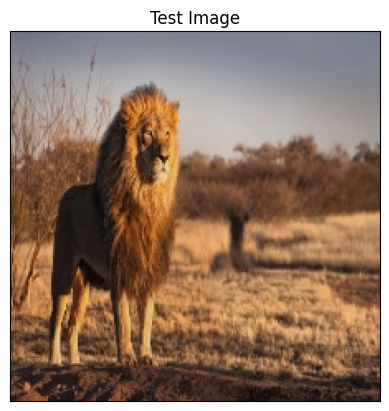

In [4]:
import cv2
image_path = 'test/Lion.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [5]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


In [6]:
print(predictions)

[[1.5382571e-13 6.2769492e-14 2.6428516e-16 4.9111635e-15 2.0545350e-14
  3.8976239e-11 4.9156753e-17 3.7492250e-14 2.5922066e-18 2.5632211e-12
  8.2661937e-13 1.0000000e+00 5.7147645e-16 5.6855154e-17 7.1603907e-20]]


In [7]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

11


In [8]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
# plt.imshow(img)
# plt.title(f"Animal: {model_prediction}")
# plt.xticks([])
# plt.yticks([])
# plt.show()
print("The animal could be:", model_prediction)

The animal could be: Lion
